##Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data Scientist at AllLife Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

###Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

###Data Dictionary

ID: Customer ID
Age: Customer’s age in completed years
Experience: # years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code.
Family: The family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have a securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use Internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?


In [4]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

In [2]:
## mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
## read / load the data
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Loan.csv")

##creating a copy of the data
df = data.copy()

In [6]:
## Getting basic idea and structure of the data

print(f'total no of rows and columns in data set',df.shape)

df.info()  ##gets the datatype of columns in our dataset

total no of rows and columns in data set (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.head()  ## getting the first 5 rows of our dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.tail()  ## getting the last 5 rows of our dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [10]:
df.describe()  ## getting the statistical summary of the dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## observations

The average age of customer is 45 years,with an average of 20 years of work experience, ranging from 23- 67 years.
Average income ~= $73774,but we can see high variability;ranges from $(-3.00) to \$224,000.
Average family size is about 2.4 members, suggesting that most households are small to medium-sized.
Approximately 29.4% of cuatomers have credit cards, while only 10.44% have personal loans.
Engagement with investment products is low, with 6.04% holding securities accounts and 10.44% having CDs.
Around 59.68% of respondents utilize online banking services.
The average education level indicates that many individuals have completed at least some higher education.
The income distribution is right-skewed, with a majority earning below the mean, as evidenced by a significant standard deviation.
The average mortgage amount is $56,498, reflecting a variety of housing situations among the customers.


In [11]:
df.isnull().sum()  ## checking for null values in dataset

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [12]:
df.duplicated().sum()  ## checking for duplicate values in dataset

0

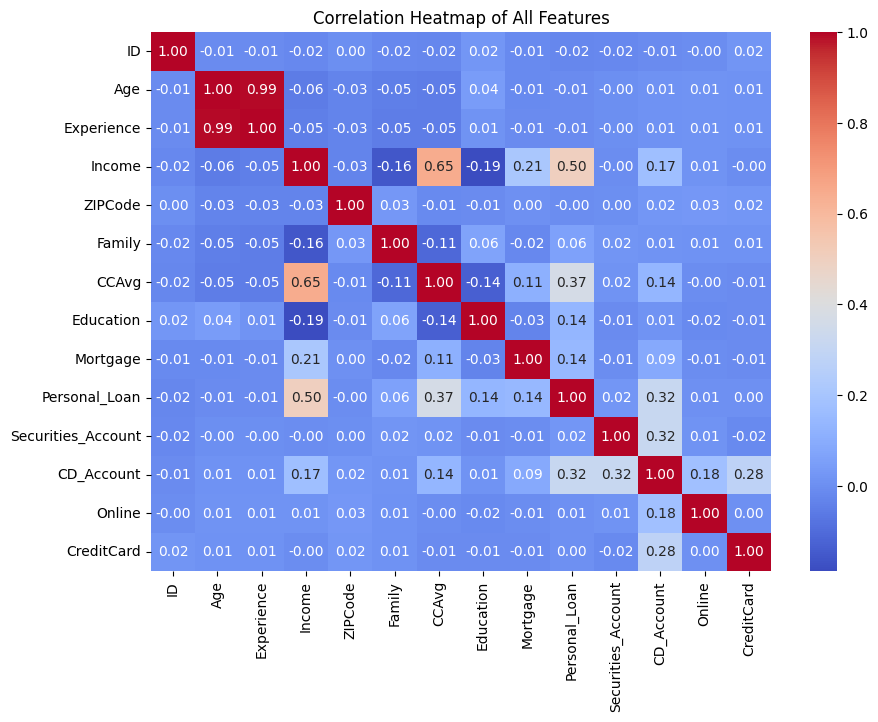

In [13]:
# Selecting only numerical columns for correlation calculation

numerical_df = df.select_dtypes(include=np.number)

# Correlation heatmap for all numerical features
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()

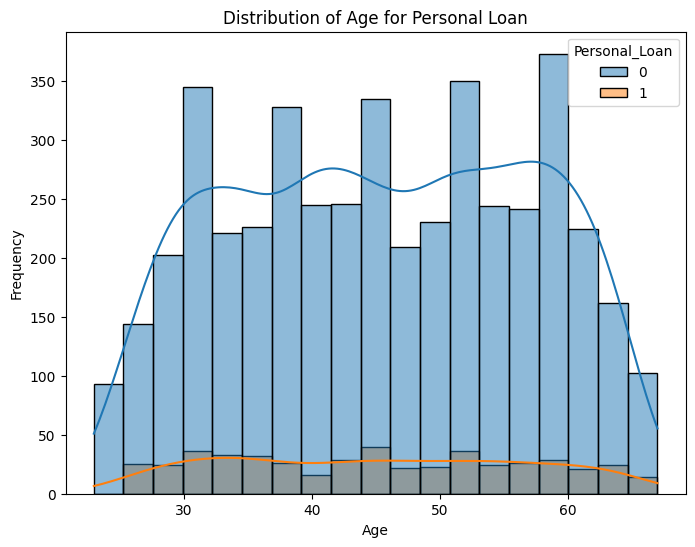

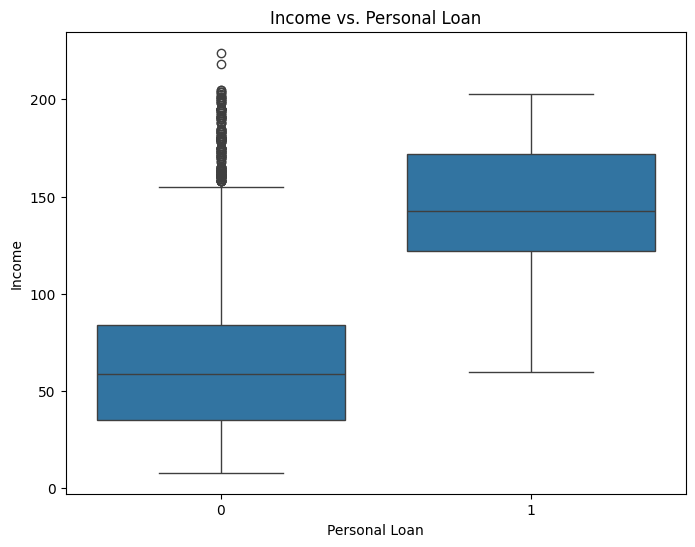

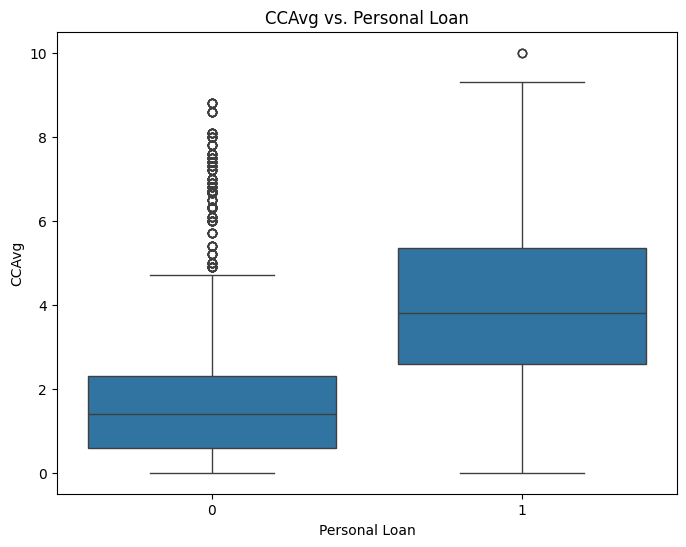

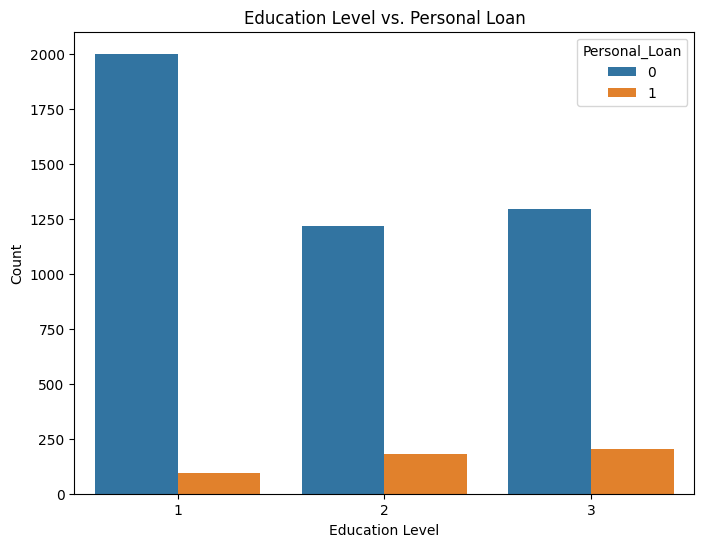

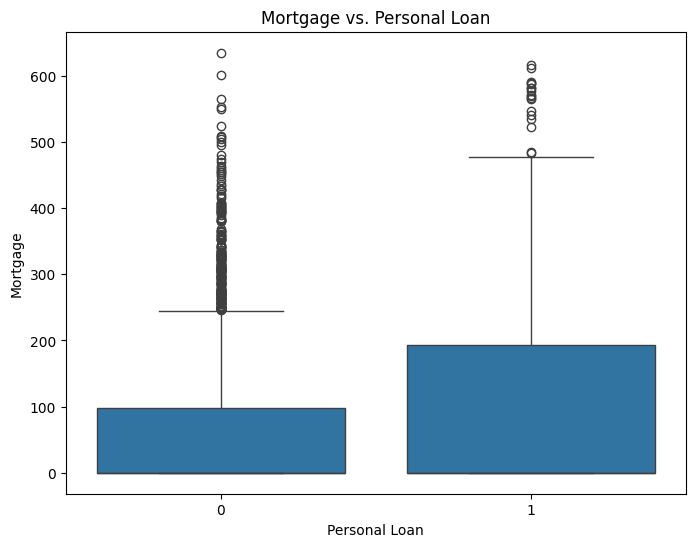

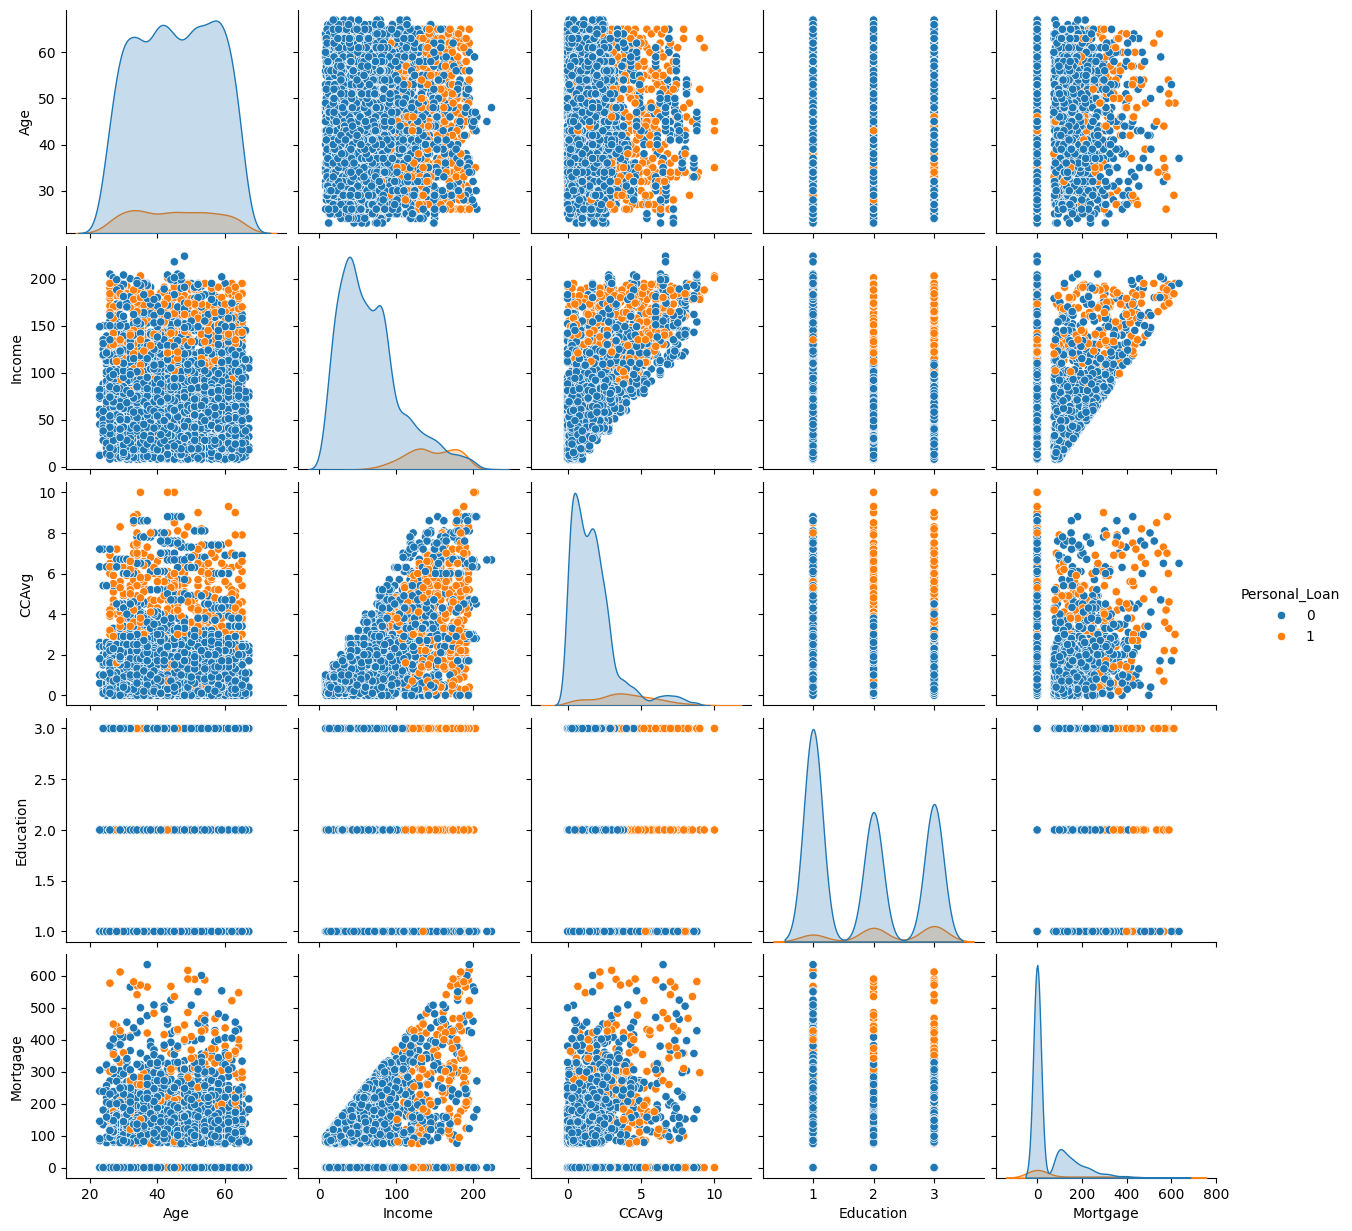

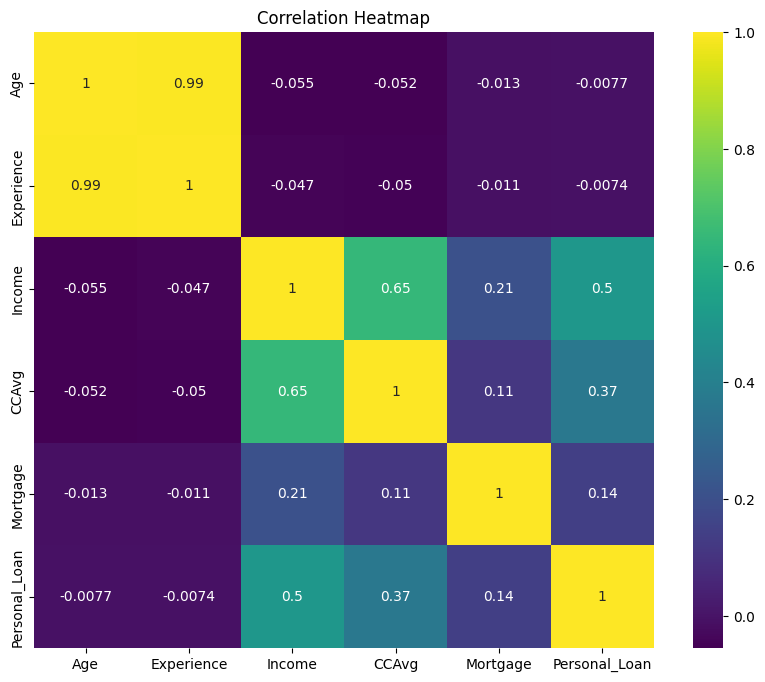

In [14]:
# Creating visualizations to understand the relationship between features and Personal Loan

# Distribution of Age for customers with and without personal loans
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", hue="Personal_Loan", kde=True)
plt.title("Distribution of Age for Personal Loan")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Relationship between Income and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Personal_Loan", y="Income")
plt.title("Income vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("Income")
plt.show()

# Relationship between CCAvg and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Personal_Loan", y="CCAvg")
plt.title("CCAvg vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("CCAvg")
plt.show()

# Relationship between Education and Personal Loan
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Education", hue="Personal_Loan")
plt.title("Education Level vs. Personal Loan")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# Relationship between Mortgage and Personal Loan
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Personal_Loan', y='Mortgage')
plt.title("Mortgage vs. Personal Loan")
plt.xlabel("Personal Loan")
plt.ylabel("Mortgage")
plt.show()

# Pairplot to visualize relationships between multiple features
sns.pairplot(df[['Age','Income', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan']], hue="Personal_Loan")
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age','Experience','Income','CCAvg','Mortgage','Personal_Loan']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
total_cust = len(df)
total_no_loan_cust = df[df['Personal_Loan'] == 0].shape[0]
percentage_no_loan = (total_no_loan_cust / total_cust) * 100
print(f'Total number of customers: {total_cust}')
print(f'Total Percentage of customers with no loan: {percentage_no_loan}')

Total number of customers: 5000
Total Percentage of customers with no loan: 90.4


#Observations:
##Correlation Insights:
###Age and Experience:
A very strong positive correlation (0.994) indicates that older individuals tend to have more work experience, suggesting that age and experience can be considered similar in this context.
###Income and CCAvg:
A moderate to strong correlation (0.646) shows that higher incomes are associated with increased credit card spending.
###Income and Personal Loan:
A moderate correlation (0.502) suggests that individuals with higher incomes are more likely to take out personal loans.
###CCAvg and Mortgage:
A very weak correlation (0.110) implies that credit card spending does not significantly affect mortgage amounts.
Low Correlation for Age and Experience with Financial.
All correlation coefficients for age and experience with income, CCAvg, mortgage, and personal loans are below 0.1, indicating they do not strongly predict these financial attributes.
###Personal Loan and CCAvg:
A moderate correlation (0.367) indicates that individuals who take out personal loans tend to spend more on credit cards, likely due to increased financial flexibility.
###Right Skewness:
The heavy right skewness in income, mortgage, and CCAvg suggests that most individuals have lower values, indicating potential income inequality, with a few earning significantly more.
###Personal Loan Statistics:
Only 10% of individuals in the dataset have taken a personal loan, reflecting either caution in borrowing or a preference for other financial options.
###Credit Amount and Spending:
The correlation between higher income and increased credit spending indicates that those with more disposable income are likely to use credit cards more frequently.
###Education and Mortgage Correlation:
Individuals with higher degrees tend to have mortgages, suggesting a link between education and financial stability, as higher education often leads to better job opportunities and increased income.
###Income and Mortgage Trends:
Higher income levels are associated with a greater likelihood of having mortgages, indicating that as income rises, individuals are more capable of taking on larger mortgage loans.
###Education
The trend that individuals with more degrees have higher incomes, increased credit spending, and more mortgages suggests a positive feedback loop, where higher education leads to better-paying jobs, facilitating greater credit utilization and mortgage capacity.

In [16]:
# Chi-Squared Test for categorical features
from scipy.stats import chi2_contingency

# Create a contingency table for Education and Personal_Loan
contingency_table = pd.crosstab(df['Education'], df['Personal_Loan'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Squared Test: chi2={chi2}, p-value={p}')

Chi-Squared Test: chi2=111.2398718738913, p-value=6.991473868665428e-25


## observations

Chi-Squared Statistic (chi2):
The value of 111.24 suggests that there is a significant difference between the observed frequencies and the expected frequencies under the null hypothesis of independence. Higher values generally indicate a stronger association.
P-Value:
The p-value of 6.99e-25 is extremely small, well below the common level of 0.05
This indicates that we reject the null hypothesis, concluding that there is a statistically significant association between the two categorical variables.

In [17]:
## Dropping unwanted columns that doesnot impact on model

df_reduced = df.drop(columns=['ID', 'ZIPCode','Online','Family','Experience','Securities_Account','CD_Account','CreditCard','Mortgage','Age'])  #
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         5000 non-null   int64  
 1   CCAvg          5000 non-null   float64
 2   Education      5000 non-null   int64  
 3   Personal_Loan  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


#Observations:

I tested the model with various features and added new ones, but the feature importance analysis only retained the columns listed above.

In [18]:
# Splitting data into features and target variable
X = df_reduced.drop('Personal_Loan', axis=1)  # Features
y = df_reduced['Personal_Loan']  # Target variable

In [19]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.tail()

,Income,CCAvg,Education
4995,40.0,1.9,3.0
4996,15.0,0.4,1.0
4997,24.0,0.3,3.0
4998,49.0,0.5,2.0
4999,83.0,0.8,1.0


In [20]:
# splitting the data for train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=42)
 ##stratify ensures that the training and test sets have a similar distribution of the response variable

In [21]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 3)
Shape of test set: (1000, 3) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


In [22]:
# creating an instance of the decision tree model
dftree1 = DecisionTreeClassifier(random_state=42)    # random values sets a seed value and enables reproducability

# fitting the model to the training data
dftree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
#definig a function to evaluate metrics to check performance of classification models

def model_performance_classification(model, predictors, target):

    #predicting using independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target,pred)
    f1 = f1_score(target, pred)

    ## Creating the dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precisoin": precision, "F1":f1},index = [0])
    return df_perf

In [24]:
def plot_confusion_matrix(model,predictors,target):

    ## predicting the target values using given model and predictors

    y_pred = model.predict(predictors)

    ## creating the confusion matrix
    cm = confusion_matrix(target, y_pred)

    #creating labels in confusion matrix

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # setting the fig_size for plot
    plt.figure(figsize=(5,3))

    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

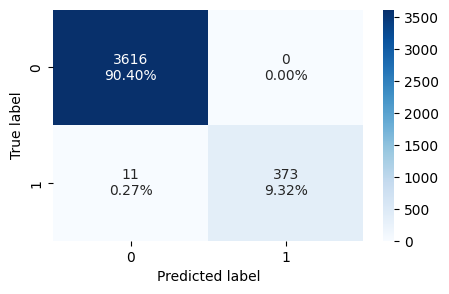

In [25]:
plot_confusion_matrix(dftree1, X_train, y_train)  ## plotting confusion matrix for training set

In [26]:
dftree1_train_perf = model_performance_classification(
    dftree1, X_train, y_train
)
dftree1_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.99725,0.971354,1.0,0.985469


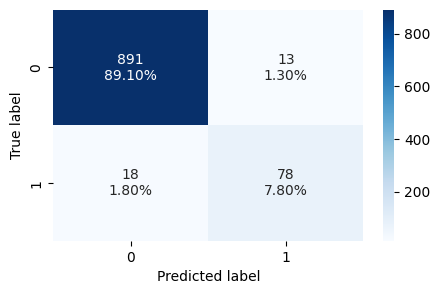

In [27]:
plot_confusion_matrix(dftree1, X_test, y_test)

In [28]:
dftree1_test_perf = model_performance_classification(
    dftree1, X_test, y_test
)
dftree1_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.969,0.8125,0.857143,0.834225


#Observations:
The model shows strong test performance with an accuracy of 97.3%, but recall (84.5%) and precision (87.5%) indicate some room for improvement, particularly in identifying positive cases. The F1 score of 0.857 reflects a reasonable balance between precision and recall.

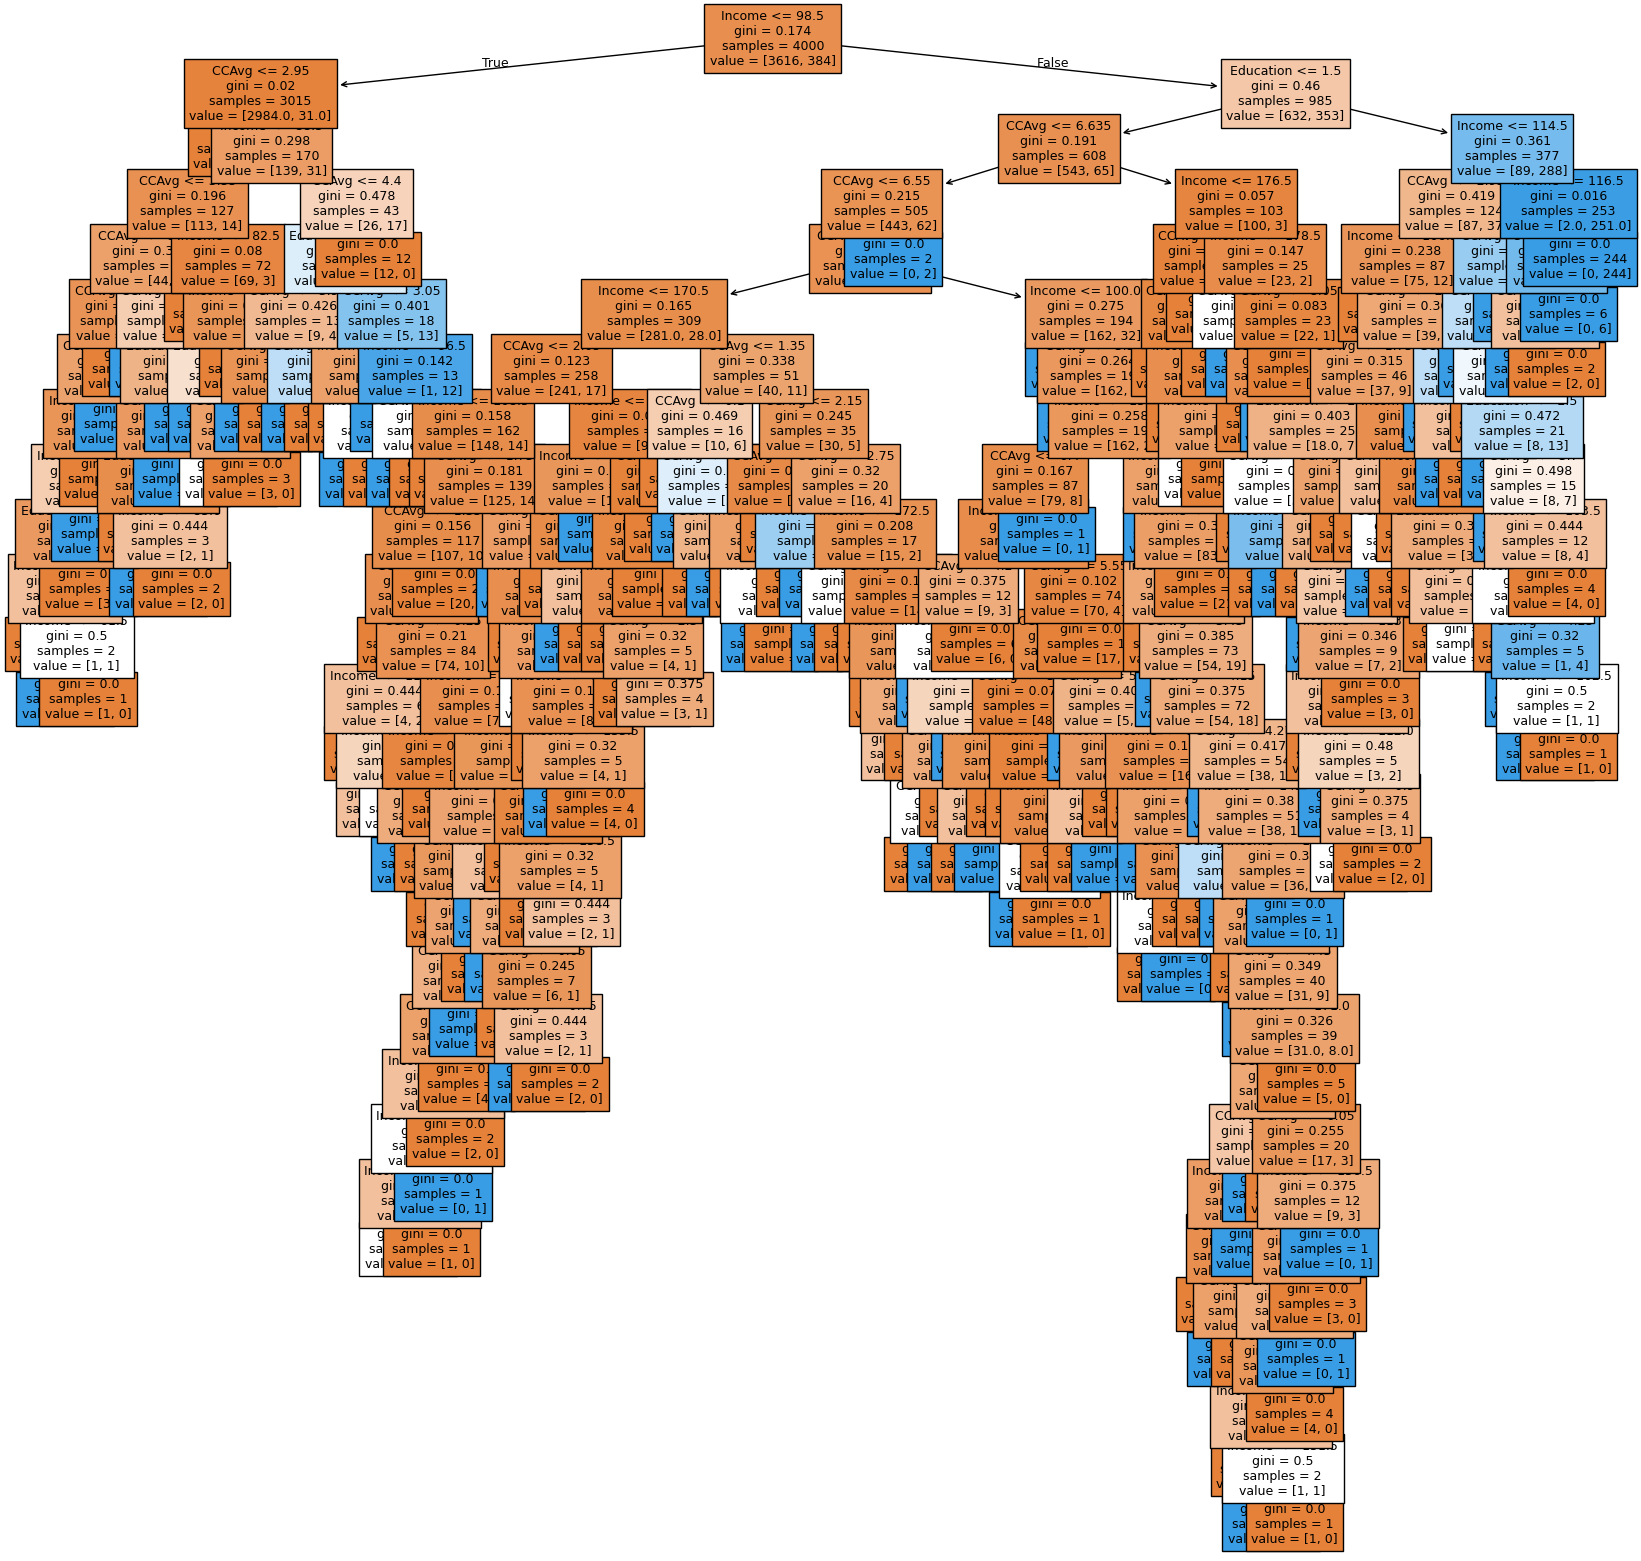

In [29]:
# list of feature names in X_train
features = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dftree1,                         # decision tree classifier model
    feature_names=features,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [30]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dftree1,    # specify the model
        feature_names=features,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 88.50
|   |   |   |--- CCAvg <= 3.55
|   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- Income <= 66.50
|   |   |   |   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 57.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Income >  57.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |

In [31]:
# Defining the parameters of the tree
# Pre Pruning

max_depth_Values = np.arange(2,12,2)
max_leaf_nodes = np.arange(10,51,10)
min_sample_split = np.arange(10,51,10)

#initializing variables to store best model and performance respectively

best_model = None
best_score = float('inf')

## iterating over all the combinations of the specified parameter values
for max_depth in max_depth_Values:
    for max_leaf in max_leaf_nodes:
        for min_split in min_sample_split:

          #initializing current parameters
          estimator = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf, min_samples_split=min_split, random_state=42)
          estimator.fit(X_train, y_train)

          #making preditions on the training and testing sets
          y_train_pred = estimator.predict(X_train)
          y_test_pred = estimator.predict(X_test)

          #calculating f1 scores for training and testing sets
          f1_train = f1_score(y_train, y_train_pred)
          f1_test = f1_score(y_test, y_test_pred)

          # calculate the absolute difference between training and test F1 scores
          score_diff = abs(f1_train - f1_test)

          # update the best estimator and best score if the current one has a smaller score difference
          if score_diff < best_score:
              best_score = score_diff
              best_model = estimator

In [32]:
# creating an instance of the best model
dftree2 = best_model

# fitting the best model to the training data
dftree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_split=20,
                       random_state=42)

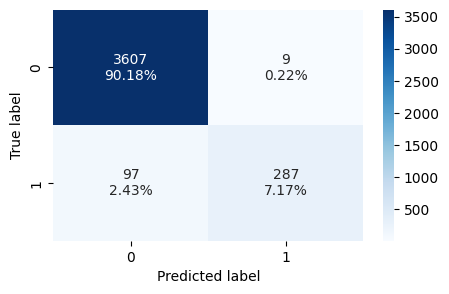

In [33]:
plot_confusion_matrix(dftree2, X_train, y_train)

In [34]:
dftree2_train_perf = model_performance_classification(
    dftree2, X_train, y_train
)
dftree2_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.9735,0.747396,0.969595,0.844118


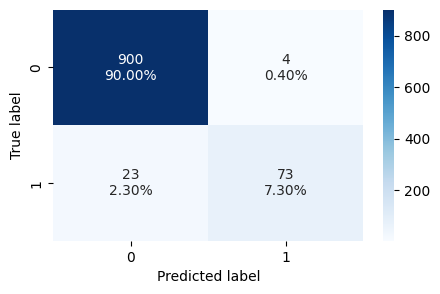

In [35]:
plot_confusion_matrix(dftree2, X_test, y_test)

In [36]:
dftree2_test_perf = model_performance_classification(
    dftree2, X_test, y_test
)
dftree2_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.973,0.760417,0.948052,0.843931


#Observations:
After pre-pruning, the model shows high accuracy on both training (97.3%) and test (97.3%) datasets, with reasonably good precision and recall. Training recall is lower (74.7%), indicating missed positive cases, while test recall improves slightly (76.1%). The F1 scores are stable, suggesting good generalization and there is room for improvement in capturing positive instances.

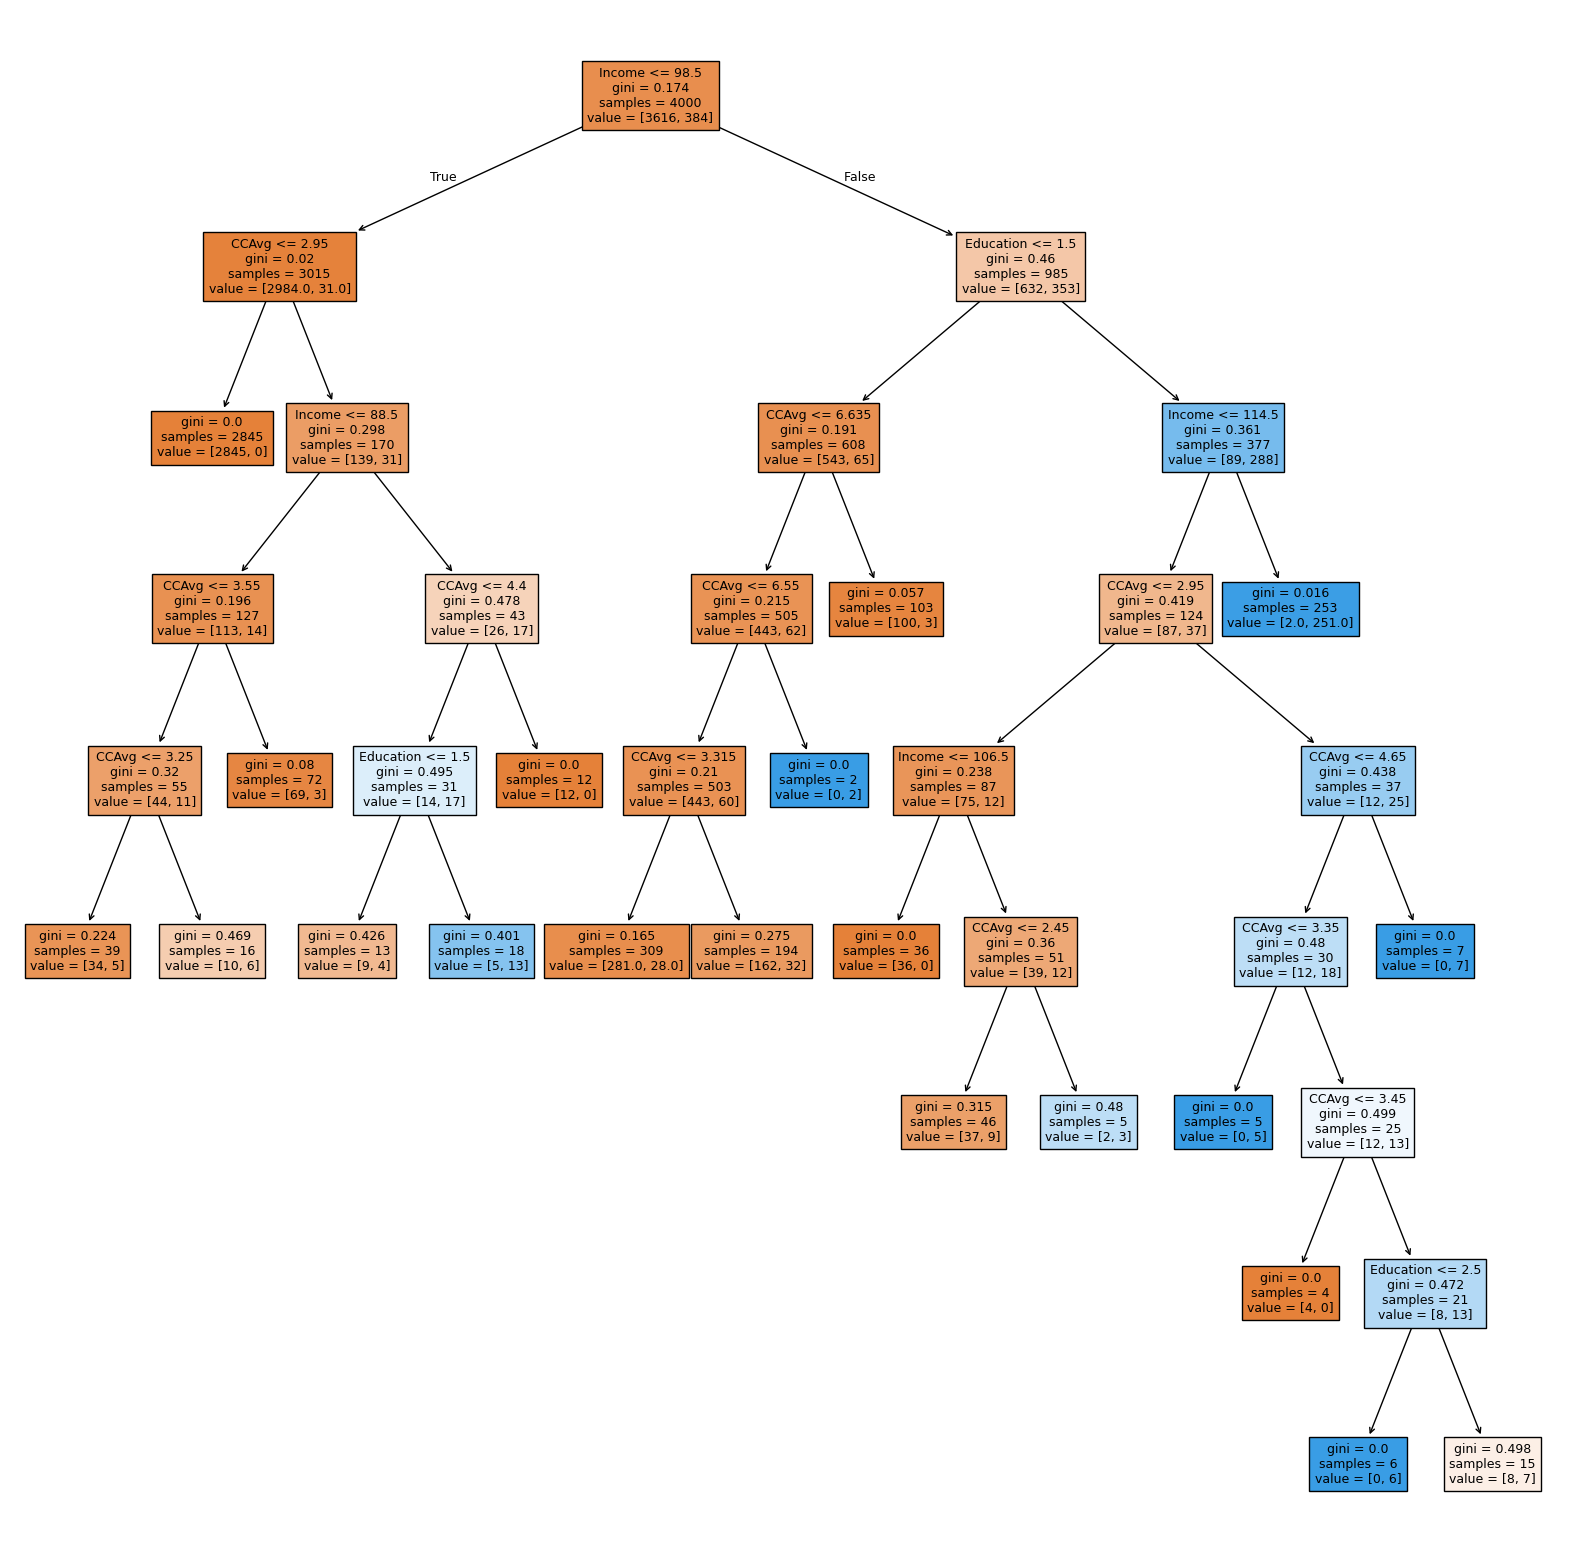

In [37]:
# Decision Tree Visualization

features = list(X_train.columns)

plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dftree2,                         # decision tree classifier model
    feature_names = features,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# adding rows to the decision tree splits if any are missing

for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [38]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dftree2,    # specify the model
        feature_names=features,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 88.50
|   |   |   |--- CCAvg <= 3.55
|   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |--- weights: [34.00, 5.00] class: 0
|   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |--- weights: [10.00, 6.00] class: 0
|   |   |   |--- CCAvg >  3.55
|   |   |   |   |--- weights: [69.00, 3.00] class: 0
|   |   |--- Income >  88.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [9.00, 4.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 13.00] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- CCAvg <= 6.63
|   |   |   |--- CCAvg <= 6.55
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [281.00, 28.00] class: 0
|   |   |   |   |--- CC

In [39]:
# Post pruning

# Creating an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path and total impurities at each alpha along the pruning path

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.003125
1,0.000017,0.003142
2,0.000025,0.003167
3,0.000031,0.003261
4,0.000042,0.003302
...,...,...
66,0.001306,0.051918
67,0.002667,0.054585
68,0.003753,0.058338
69,0.020023,0.078361


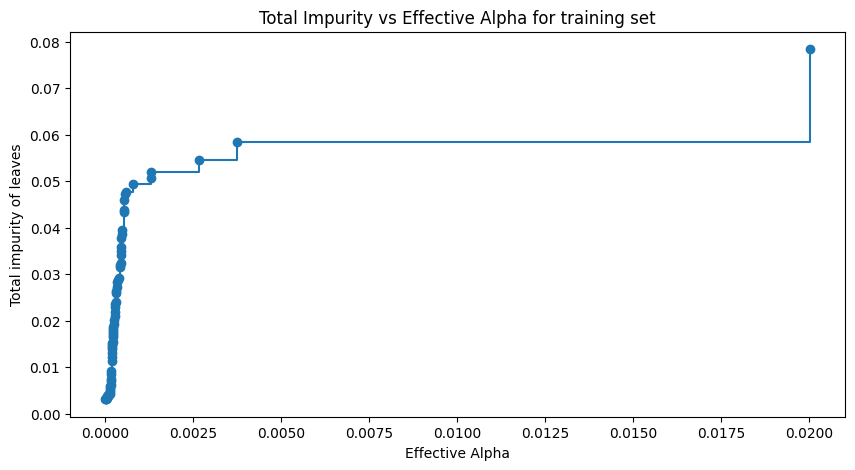

In [41]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

#Observations:
###Initial Region (Low Alpha)
At very low alpha values, the tree is complex with many leaves, leading to lower impurity since the tree overfits the data.
###Transition Region
As alpha increases, some branches of the tree are pruned, and the total impurity increases. This indicates a trade-off: reducing complexity at the cost of accuracy on the training set.
###Flat Region (High Alpha)
At higher alpha values, pruning becomes more aggressive. The tree becomes very simple (fewer leaves), and the total impurity stabilizes or even spikes as the tree generalizes poorly to the training data.

In [42]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815694


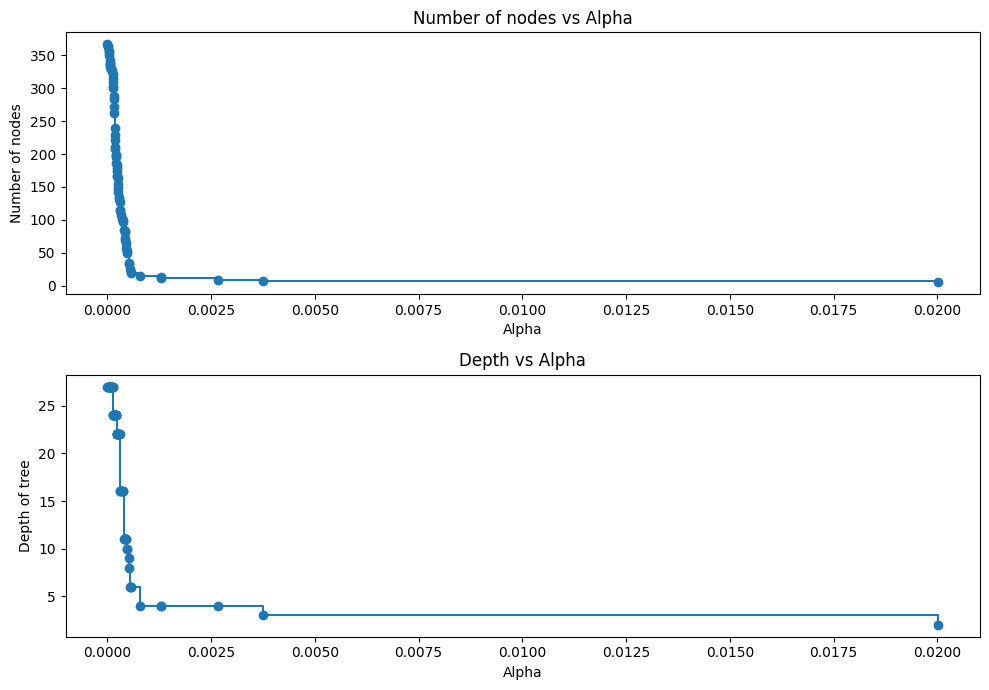

In [43]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [44]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [45]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


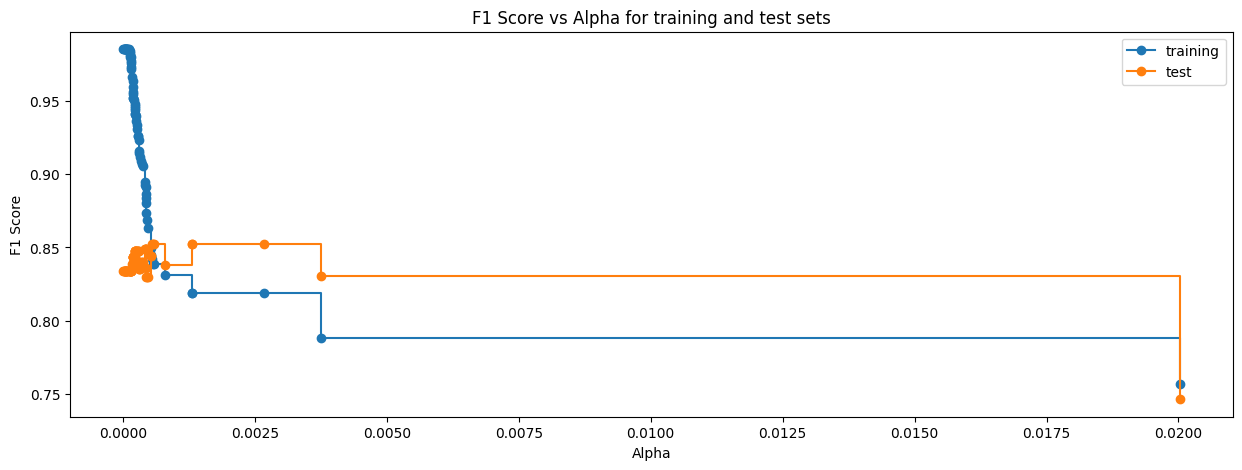

In [46]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [47]:
print(test_f1_scores)


[0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8342245989304813, 0.8387096774193549, 0.8387096774193549, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8432432432432433, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8351648351648352, 0.8351648351648352, 0.8351648351648352, 0.8397790055248618, 0.8397790055248618, 0.8397790055248618,

In [48]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0005468468468468469, random_state=42)


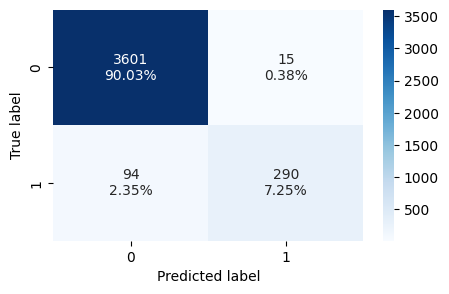

In [49]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [50]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.97275,0.755208,0.95082,0.8418


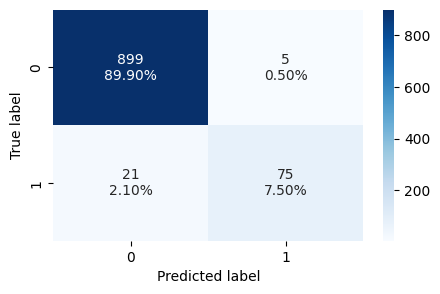

In [51]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [52]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.974,0.78125,0.9375,0.852273


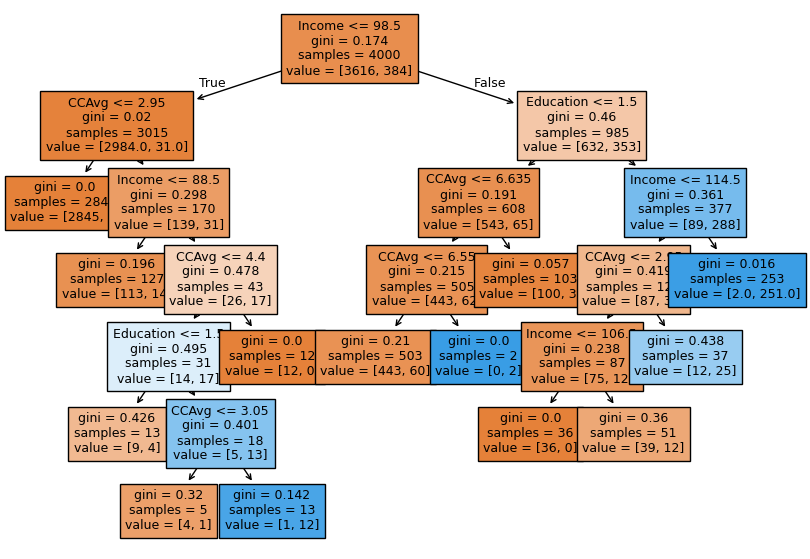

In [53]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [54]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 88.50
|   |   |   |--- weights: [113.00, 14.00] class: 0
|   |   |--- Income >  88.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [9.00, 4.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |--- weights: [4.00, 1.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |--- weights: [1.00, 12.00] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- CCAvg <= 6.63
|   |   |   |--- CCAvg <= 6.55
|   |   |   |   |--- weights: [443.00, 60.00] class: 0
|   |   |   |--- CCAvg >  6.55
|   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |--- CCAvg >  6.63
|   |   |   |--- weights: [100.00, 3.00] class: 0
|   |---

In [55]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dftree1_train_perf.T,
        dftree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.997250,0.973500,0.972750
Recall,0.971354,0.747396,0.755208
Precisoin,1.000000,0.969595,0.950820
F1,0.985469,0.844118,0.841800


In [56]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dftree1_test_perf.T,
        dftree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.969000,0.973000,0.974000
Recall,0.812500,0.760417,0.781250
Precisoin,0.857143,0.948052,0.937500
F1,0.834225,0.843931,0.852273


Observations:
Training Performance: The default decision tree (sklearn default) exhibits very high accuracy (0.997), recall (0.971), precision (1.000), and F1 score (0.985). This indicates that the model is likely overfitting the training data, as the performance metrics are unusually high compared to the test set results.
Test Set Performance:
The Post-Pruning model slightly outperforms the other two models in test set accuracy (0.974), recall (0.781), precision (0.937), and F1 score (0.852). This suggests that the Post-Pruning model has better generalization to unseen data.
The Pre-Pruning model is also competitive, with the second-highest test accuracy (0.973) and good precision (0.948), but its recall and F1 score are slightly lower than the Post-Pruning model.
Model Behavior:
Pre-Pruning helps reduce overfitting, but it sacrifices some recall and F1 score. It's more conservative in splitting the tree, which could result in lower sensitivity (recall).
Post-Pruning shows a better balance between precision and recall, with a slight improvement in test set performance overall. It seems to offer the best trade-off between generalization and performance metrics.
Final Best Model:
Post-Pruning Decision Tree is the best model for this scenario based on the test set performance. It has the highest accuracy (0.974), recall (0.781), precision (0.937), and F1 score (0.852) among the models tested.
Conclusion:
The Post-Pruning decision tree achieves the best overall performance on the test set and is likely the best choice to avoid overfitting while maintaining good predictive power.

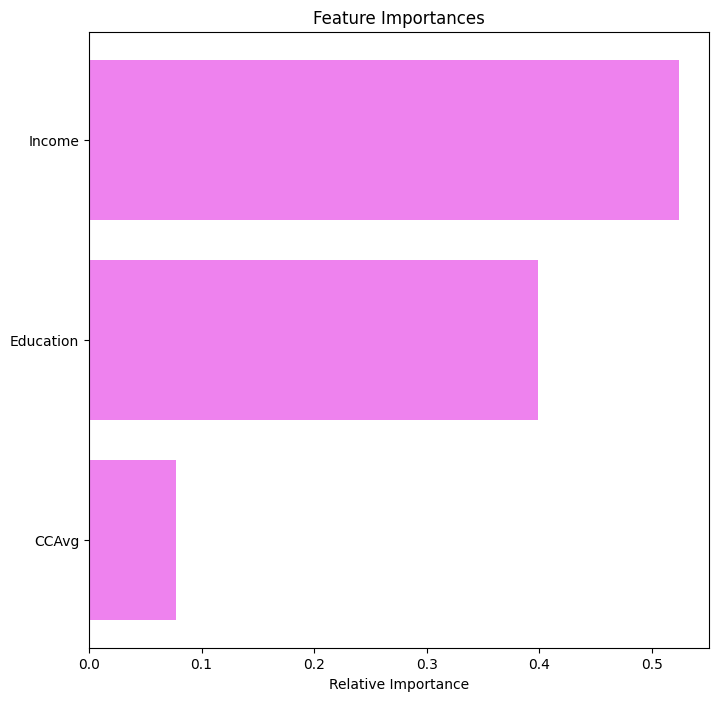

In [57]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [58]:
%%time
# choosing a data point
Personal_Loan = X_test.iloc[:2, :]

# making a prediction
Loan_prediction = dtree3.predict(Personal_Loan)

print(Loan_prediction)

[0 1]
CPU times: user 4.19 ms, sys: 0 ns, total: 4.19 ms
Wall time: 6.13 ms


##Observation:

The model, after hyperparameter tuning, performs well, but it still has many leaf nodes remaining even after pruning. This could be attributed to several factors, including model complexity and the settings used during hyperparameter tuning. We could consider implementing more aggressive pruning techniques or adding new features that are relevant to the model.

# Working with new model and adding new features

In [60]:
# dropping unwanted columns that doesn't impact much on the data

df_new = df.drop(columns=['ID', 'ZIPCode','Online','Family','Experience','Securities_Account','CD_Account','CreditCard','Mortgage','Age'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Income         5000 non-null   int64  
 1   CCAvg          5000 non-null   float64
 2   Education      5000 non-null   int64  
 3   Personal_Loan  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


In [61]:
# Creating new features to increase model performance

# Income to Mortgage Ratio

df_new['I_M_R'] = df['Income']/(df['Mortgage']+1)

# Education

df_new['E_I'] = df['Education'] * df['Income']

# Family Size

df_new['Has_Dependents'] = (df['Family'] > 0).astype(int)

# Total Accounts that a customer holds

df_new['Total_Accounts'] = (df['Securities_Account'] + df['CD_Account'] +
                        df['Online'] + df['CreditCard'])

# Wealth Indicator (How wealthy can a customer be when debt is excluded)

df_new['Wealth_Indicator'] = (df['Securities_Account'] + df['CD_Account'] -
                           df['Mortgage'])

# Experience to Age Ratio

df_new['Experience_to_Age_Ratio'] = df['Experience'] / (df['Age'] + 1)

# Online Banking Usage

df_new['Uses_Online_Banking'] = (df['Online'] > 0).astype(int)

# updated DataFrame with new features
print(df_new.head())

   Income  CCAvg  Education  Personal_Loan  I_M_R  E_I  Has_Dependents  \
0      49    1.6          1              0   49.0   49               1   
1      34    1.5          1              0   34.0   34               1   
2      11    1.0          1              0   11.0   11               1   
3     100    2.7          2              0  100.0  200               1   
4      45    1.0          2              0   45.0   90               1   

   Total_Accounts  Wealth_Indicator  Experience_to_Age_Ratio  \
0               1                 1                 0.038462   
1               1                 1                 0.413043   
2               0                 0                 0.375000   
3               0                 0                 0.250000   
4               1                 0                 0.222222   

   Uses_Online_Banking  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [62]:
Q = df_new.drop(columns=['Personal_Loan'],axis = 1)
s = df_new['Personal_Loan']

In [63]:
Q_train, Q_test, s_train, s_test = train_test_split(Q, s, test_size = 0.2, random_state = 10)

In [64]:
print("Shape of training set:", Q_train.shape)
print("Shape of test set:", Q_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*s_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*s_test.value_counts(normalize=True))

Shape of training set: (4000, 10)
Shape of test set: (1000, 10) 

Percentage of classes in training set:
Personal_Loan
0    90.325
1     9.675
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.7
1     9.3
Name: proportion, dtype: float64


In [65]:
sftree1 = DecisionTreeClassifier(random_state = 10)
sftree1.fit(Q_train, s_train)

DecisionTreeClassifier(random_state=10)

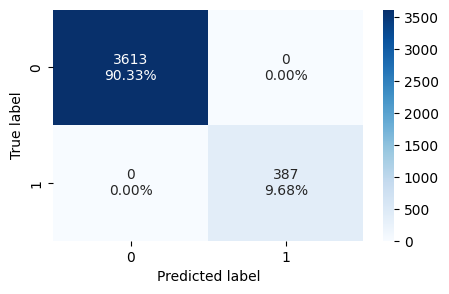

In [66]:
plot_confusion_matrix(sftree1, Q_train, s_train)

In [67]:
sftree1_train_perf = model_performance_classification(
    sftree1, Q_train, s_train
)
sftree1_train_perf

,Accuracy,Recall,Precisoin,F1
0,1.0,1.0,1.0,1.0


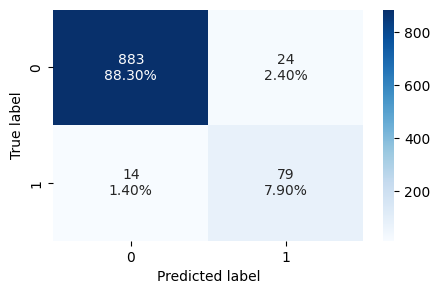

In [68]:
plot_confusion_matrix(sftree1, Q_test,s_test)

In [69]:
sftree1_test_perf = model_performance_classification(sftree1, Q_test,s_test)
sftree1_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.962,0.849462,0.76699,0.806122


In [70]:
### prepruning for new feature df

max_depth = np.arange(2,9,2)
max_leafs = np.arange(10,51,10)
min_split = np.arange(10,51,10)

best_score2 = float('inf')
best_model2 = None

for m_depth in max_depth:
    for max_leaf in max_leafs:
        for m_split in min_split:

            model = DecisionTreeClassifier(max_depth=m_depth, max_leaf_nodes=max_leaf, min_samples_split=m_split, random_state=10)

            model.fit(Q_train,s_train)

            s_train_pred = model.predict(Q_train)
            s_test_pred = model.predict(Q_test)

            f1_train2 = f1_score(s_train, s_train_pred)
            f1_test2 = f1_score(s_test, s_test_pred)

            score2 = abs(f1_train2 - f1_test2) # Calculate difference between f1 scores

            if score2 < best_score2: # Update best_score and best_model if score_diff is lower
                best_score2 = score2
                best_model2 = model

In [71]:
sftree2 = best_model2

sftree2.fit(Q_train, s_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, min_samples_split=30,
                       random_state=10)

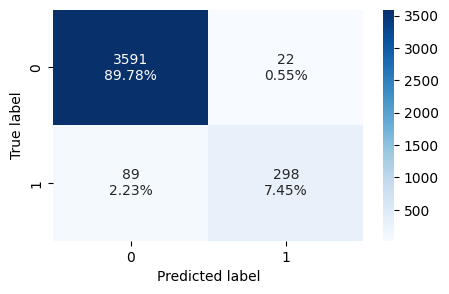

In [72]:
plot_confusion_matrix(sftree2, Q_train, s_train)

In [73]:
sftree2_train_perf = model_performance_classification(
    sftree2, Q_train, s_train
)
sftree2_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.97225,0.770026,0.93125,0.842999


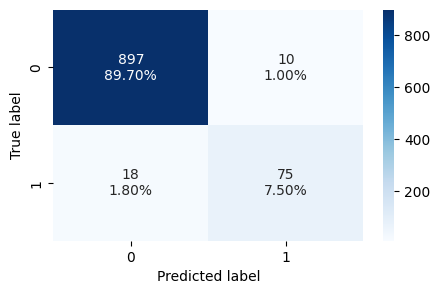

In [74]:
plot_confusion_matrix(sftree2, Q_test, s_test)

In [75]:
sftree2_test_perf = model_performance_classification(sftree2,Q_test,s_test)
sftree2_test_perf

,Accuracy,Recall,Precisoin,F1
0,0.972,0.806452,0.882353,0.842697


In [76]:
clf2 = DecisionTreeClassifier(random_state = 10)

path2 = clf2.cost_complexity_pruning_path(Q_train, s_train)

ccp_alpha2, impurities2 = path.ccp_alphas, path.impurities

In [77]:
# Initialize an empty list to store the decision tree classifiers
clfs2 = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_a in ccp_alpha2:
    # Create an instance of the DecisionTreeClassifier
    clff2 = DecisionTreeClassifier(ccp_alpha=ccp_a, random_state=10)

    # Fit the classifier to the training data
    clff2.fit(Q_train, s_train)

    # Append the trained classifier to the list
    clfs2.append(clff2)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs2[-1].tree_.node_count, ccp_alpha2[-1]
    )
)

Number of nodes in the last tree is 3 with ccp_alpha 0.04760359071815694


In [78]:
train_f1_scores2 = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs2:
    # Predict labels for the training set using the current decision tree classifier
    pred_train2 = clf.predict(Q_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train2 = f1_score(s_train, pred_train2)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores2.append(f1_train2)

In [79]:
test_f1_scores2 = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs2:
    # Predict labels for the test set using the current decision tree classifier
    pred_test2 = clf.predict(Q_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test2 = f1_score(s_test, pred_test2)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores2.append(f1_test2)

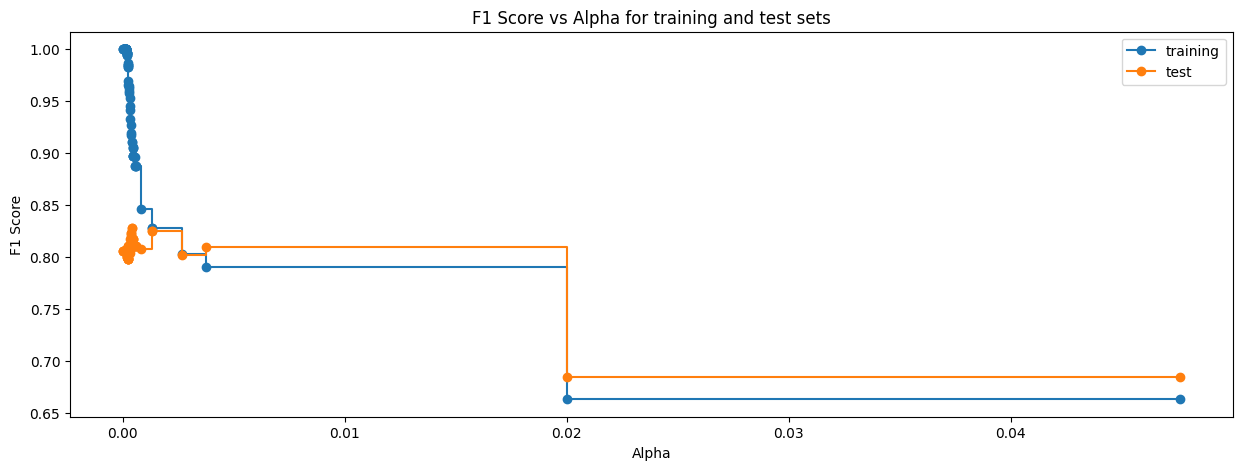

In [80]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alpha2, train_f1_scores2, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alpha2, test_f1_scores2, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [81]:
print(test_f1_scores2)

[0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8061224489795918, 0.8041237113402062, 0.8041237113402062, 0.8041237113402062, 0.8041237113402062, 0.8041237113402062, 0.8, 0.8, 0.8, 0.8, 0.7979274611398963, 0.7979274611398963, 0.7979274611398963, 0.7979274611398963, 0.7979274611398963, 0.8105263157894737, 0.8105263157894737, 0.8105263157894737, 0.806282722513089, 0.806282722513089, 0.806282722513089, 0.8042328042328042, 0.8085106382978723, 0.8085106382978723, 0.8172043010752689, 0.8216216216216217, 0.8235294117647058, 0.8235294117647058, 0.8279569892473119, 0.8279569892473119, 0.8172043010752689, 0.

In [82]:
# creating the model where we get highest test F1 Score
best_fit_model2 = np.argmax(test_f1_scores2)

# selcting the decision tree model corresponding to the highest test score
sftree3 = clfs2[best_fit_model2]
print(sftree3)

DecisionTreeClassifier(ccp_alpha=0.00041161209518697446, random_state=10)


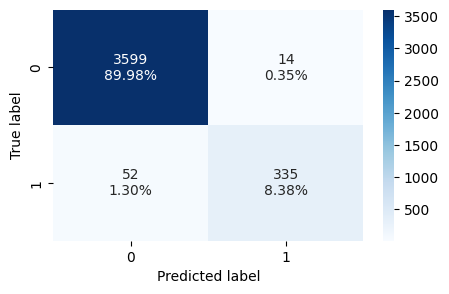

In [83]:
plot_confusion_matrix(sftree3, Q_train, s_train)

In [84]:
sftree3_train_perf = model_performance_classification(
    sftree3, Q_train, s_train
)
sftree3_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.9835,0.865633,0.959885,0.910326


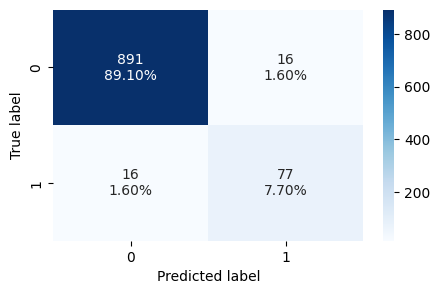

In [85]:
plot_confusion_matrix(sftree3, Q_test, s_test)

In [86]:
sftree3_test_perf = model_performance_classification(
    sftree3, Q_test, s_test
)
sftree3_train_perf

,Accuracy,Recall,Precisoin,F1
0,0.9835,0.865633,0.959885,0.910326


In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dftree1_train_perf.T,
        dftree2_train_perf.T,
        dtree3_train_perf.T,
        sftree1_train_perf.T,
        sftree2_train_perf.T,
        sftree2_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "New Decision Tree (sklearn default)",
    "New Decision Tree (Pre-Pruning)",
    "New Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),New Decision Tree (sklearn default),New Decision Tree (Pre-Pruning),New Decision Tree (Post-Pruning)
Accuracy,0.997250,0.973500,0.972750,1.0,0.972250,0.972250
Recall,0.971354,0.747396,0.755208,1.0,0.770026,0.770026
Precisoin,1.000000,0.969595,0.950820,1.0,0.931250,0.931250
F1,0.985469,0.844118,0.841800,1.0,0.842999,0.842999


In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dftree1_test_perf.T,
        dftree2_test_perf.T,
        dtree3_test_perf.T,
        sftree1_test_perf.T,
        sftree2_test_perf.T,
        sftree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "New Decision Tree (sklearn default)",
    "New Decision Tree (Pre-Pruning)",
    "New Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),New Decision Tree (sklearn default),New Decision Tree (Pre-Pruning),New Decision Tree (Post-Pruning)
Accuracy,0.969000,0.973000,0.974000,0.962000,0.972000,0.968000
Recall,0.812500,0.760417,0.781250,0.849462,0.806452,0.827957
Precisoin,0.857143,0.948052,0.937500,0.766990,0.882353,0.827957
F1,0.834225,0.843931,0.852273,0.806122,0.842697,0.827957


#Observation:

 The New Decision Tree (sklearn default) shows perfect scores on the training set but may be overfitting, as evidenced by its lower performance on the test set.

#Summary
##Test Set Performance:
###Post-Pruning Decision Tree:
Highest F1 score (0.852273), good balance of recall (0.781250) and precision (0.937500).
###Pre-Pruning Decision Tree:
Slightly lower F1 score (0.843931) but very high precision (0.948052), indicating it may be conservative in its predictions.
###Default Decision Tree:
High accuracy (0.969000) but lower recall (0.812500), suggesting it may miss some potential buyers.
##Train Set Performance:
###New Decision Tree (sklearn default):
Perfect accuracy (1.0) but may overfit the training data. Recall and precision metrics are high.
###Pre-Pruning and Post-Pruning:
Consistently lower accuracy and metrics than the default tree but more balanced in terms of recall and precision.
###Conclusion
The Post-Pruning Decision Tree is the best fit for predicting personal loan purchases, offering a strong balance of performance metrics while being less prone to overfitting.

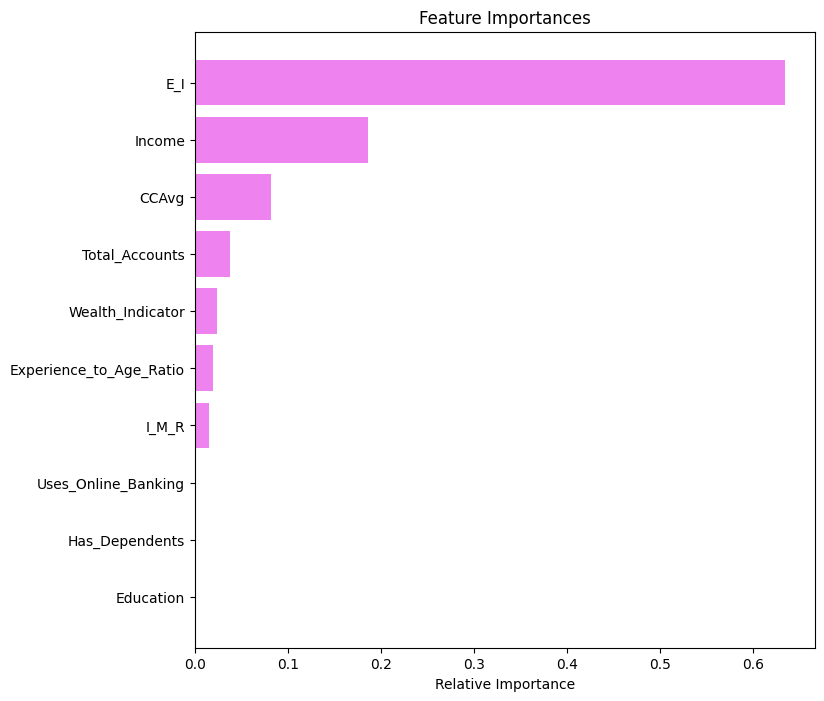

In [89]:
# importance of features in the tree building
importances2 = sftree3.feature_importances_
indices2 = np.argsort(importances2)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices2)), importances2[indices2], color="violet", align="center")

# Get feature names from Q_train columns
feature_names2 = Q_train.columns

plt.yticks(range(len(indices2)), [feature_names2[i] for i in indices2])  # Use feature_names2 here
plt.xlabel("Relative Importance")
plt.show()

#Reccomendations:


#Focus on High-Probability Customers:
Prioritize the top 10-15% of customers with the highest likelihood of purchasing a loan. This will optimize campaign efficiency and improve conversion rates.
#Utilize Key Customer Attributes:
Tailor marketing messages and offers based on key customer attributes (such as income, credit score, and deposit size). Customize campaigns to different segments according to these characteristics.
#Segment and Personalize Messaging:
Develop targeted campaigns for customers with varying probabilities of loan purchase
#High-probability:
Highlight loan advantages like low interest rates.
#Medium-probability:
Provide educational content and address potential concerns such as loan eligibility.
#Low-probability:
Offer nurturing content, such as financial advice, to build a relationship over time.
#Improve Recall (Minimize Missed Opportunities):
Slightly expand the target audience to include more customers who may be overlooked by the model, thus enhancing recall and boosting conversions.
#Experiment with Campaign Channels:
Test different marketing channels (e.g., email, SMS, mobile apps, in-branch promotions) to determine which works best for each customer segment. Use A/B testing to continuously refine strategies.
#Monitor and Optimize Campaigns:
Continuously track and evaluate campaign performance. Adjust strategies based on real-time data and customer feedback to maximize ROI.
#Leverage Cross-Sell Opportunities:
Identify and promote related products like credit cards or insurance, particularly to customers who are converting to loan buyers, to increase overall customer lifetime value.
#Conclusion:
Target high-probability customers through personalized, segmented campaigns across various channels. Continuously optimize campaign strategies and leverage cross-sell opportunities to maximize value and improve performance.

# Thank You!